In [1]:
from problog.program import PrologString
from problog.tasks.dcproblog.solver import InferenceSolver
from problog.tasks.dcproblog.parser import DCParser
from problog.logic import Term

import torch

In [2]:
configuration = {
    "abe_name":"pyro",
    "n_samples":20000,
    "ttype":"float32",
    "device":"cpu",
}

In [3]:
str_program_1 = """
0.2::a.
b~beta(1,1):- a.
b~beta(2,2):- \+a.
B::coin_flip(N):- B is b.

query_density(b).
"""

In [4]:
str_program_2 = """
0.2::a.
b~beta(1,1):- a.
b~beta(1,2):- \+a.
B::coin_flip(N):- B is b.

evidence(coin_flip(1), true).
evidence(coin_flip(2), false).
evidence(coin_flip(3), true).

query_density(b).
"""

In [5]:
solver = InferenceSolver(**configuration)
program_1 = PrologString(str_program_1, parser=DCParser())
program_2 = PrologString(str_program_2, parser=DCParser())

In [6]:
probabilities_1 = solver.probability(program_1, **configuration)
probabilities_2 = solver.probability(program_2, **configuration)

In [7]:
b_term = Term("b")
mixture_b_prior = probabilities_1["dq"][b_term]
mixture_b_posterior = probabilities_2["dq"][b_term]

In [8]:
print(mixture_b_prior)
print(mixture_b_posterior)

Mixture(MixComp₀,MixComp₁)
Mixture(MixComp₀,MixComp₁)


In [9]:
b_prior1, b_prior2, = mixture_b_prior.components()
b_posterior1, b_posterior2 = mixture_b_posterior.components()

In [15]:
print(b_posterior1.samples)
print(b_posterior1.weights)
print(b_prior1.samples.flatten())
torch.full(b_prior1.samples.shape, b_prior1.weights).flatten().numpy()

tensor([[0.4326, 0.3350, 0.4277,  ..., 0.9931, 0.1546, 0.9807]])
tensor([0.2189, 0.1538, 0.2158,  ..., 0.0141, 0.0416, 0.0382])
tensor([0.6976, 0.4565, 0.2203,  ..., 0.4760, 0.4230, 0.5081])


array([0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2], dtype=float32)

In [28]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

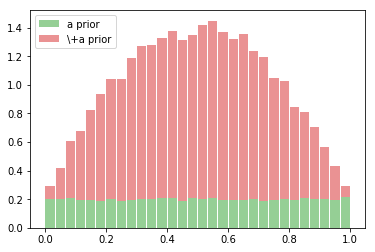

In [41]:
plt.hist(
    (b_prior1.samples.flatten().numpy(),b_prior2.samples.flatten().numpy()),
    weights = (torch.full(b_prior1.samples.shape, b_prior1.weights).flatten().numpy(), torch.full(b_prior2.samples.shape, b_prior2.weights).flatten().numpy()),
    density = True,
    bins = 30,
    rwidth = 0.9,
    alpha = 0.5,
    label = ["a prior","\+a prior"],
    color = colors[2:4],
    stacked=True,
)

plt.legend(loc="upper left")
plt.savefig('prior.pdf',bbox_inches='tight', format='pdf');

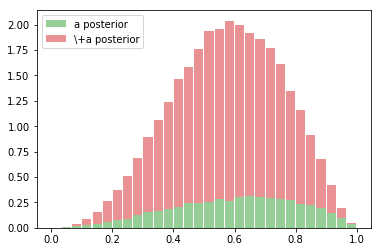

In [44]:
plt.hist(
    (b_posterior1.samples.flatten().numpy(),b_posterior2.samples.flatten().numpy()),
    weights = (b_posterior1.weights.flatten().numpy(), b_posterior2.weights.flatten().numpy()),
    density=True,
    bins=30,
    rwidth=0.9,
    alpha = 0.5,
    label=["a posterior","\+a posterior"],
    color = colors[2:4],
    stacked=True,
)

plt.legend(loc="upper left");
plt.savefig('posterior.pdf',bbox_inches='tight', format='pdf');